# Cleaning and Preprocessing Data for Machine Learning

In [5]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



In [13]:
# Read the csv file into a pandas DataFrame

animal_outcome = pd.read_csv('../../../Animals.csv')
animal_outcome.head()

,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration
0,0,A748291,Dog,06/01/2016,Pit Bull Mix,Black,Intact,Spayed,Female,300,Normal,05/01/2017 02:26:00 PM,Stray,*Madison,365,09/04/2017 12:00:00 AM,Partner,Transfer,125 days 09:34:00.000000000
1,1,A750529,Dog,12/21/2016,Miniature Schnauzer Mix,White/Cream,Intact,Spayed,Female,150,Normal,05/28/2017 01:22:00 PM,Stray,NaN,150,06/01/2017 04:42:00 PM,Partner,Transfer,4 days 03:20:00.000000000
2,2,A730601,Cat,12/07/2015,Domestic Shorthair Mix,Blue Tabby,Intact,Neutered,Male,210,Normal,07/07/2016 12:11:00 PM,Stray,NaN,210,07/08/2016 09:00:00 AM,SCRP,Transfer,0 days 20:49:00.000000000
3,3,A748238,Dog,05/01/2014,Bichon Frise Mix,White,Intact,Neutered,Male,1095,Normal,05/01/2017 10:53:00 AM,Stray,NaN,1095,05/06/2017 03:57:00 PM,Partner,Transfer,5 days 05:04:00.000000000
4,4,A683644,Dog,06/13/2014,Border Collie Mix,Brown/White,Intact,Spayed,Female,28,Nursing,07/13/2014 11:02:00 AM,Owner Surrender,*Zoey,120,11/06/2014 10:06:00 AM,Foster,Adoption,115 days 23:04:00.000000000


In [39]:
import numpy as np

group = animal_outcome.groupby('Animal Type')
agg = group.aggregate({'Breed': np.count})
agg

AttributeError: module 'numpy' has no attribute 'count'

In [40]:
outcomes = {'Transfer': 1, 'Adoption': , 'monReths': 30, 'month': 30, 'weeks': 7, 'week': 7, 'days': 1, 'day': 1, 'nan': 0}

SyntaxError: invalid syntax (<ipython-input-40-62754759a77e>, line 1)

In [24]:
X = animal_outcome[["Outcome Age", "Gender", "Color", "Fixed upon Intake", "Fixed upon Outcome", "Intake Type", "Intake Condition"]]
y = animal_outcome["Outcome Type"].values.reshape(-1, 1)
print(X.shape, y.shape)

(113429, 7) (113429, 1)


## Working with Categorical Data

What's wrong with the following code?

```
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
```

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing library for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [25]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Gender"])
data_binary_encoded.head()

,Outcome Age,Color,Fixed upon Intake,Fixed upon Outcome,Intake Type,Intake Condition,Gender_Female,Gender_Male
0,365,Black,Intact,Spayed,Stray,Normal,1,0
1,150,White/Cream,Intact,Spayed,Stray,Normal,1,0
2,210,Blue Tabby,Intact,Neutered,Stray,Normal,0,1
3,1095,White,Intact,Neutered,Stray,Normal,0,1
4,120,Brown/White,Intact,Spayed,Owner Surrender,Nursing,1,0


We can encode multiple columns using `get_dummies`.

In [26]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Outcome Age,Gender_Female,Gender_Male,Color_Agouti,Color_Agouti/Brown Tabby,Color_Agouti/Cream,Color_Agouti/Gray,Color_Agouti/White,Color_Apricot,Color_Apricot/Brown,...,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick
0,365,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,150,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,210,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1095,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,120,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train/Test Split

The first step is to split your data into Training and Testing using `train_test_split`.

In [29]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)

X_train.head()

Exception: Data must be 1-dimensional

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [28]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: could not convert string to float: 'Transfer'

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

KeyError: 'Gender'

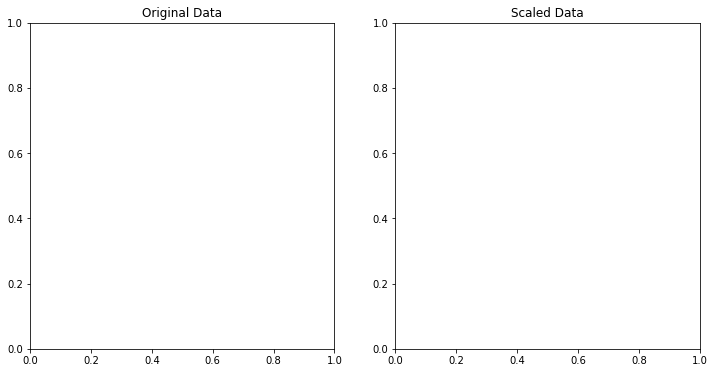

In [23]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Gender"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Gender"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [10]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [11]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


Step 2) Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)

Step 3) Fit the Model to the scaled training data and make predictions using the test data

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [14]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [15]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 5515.396373763891, R2: 0.4602922408994329


Step 4) Make a residual plot

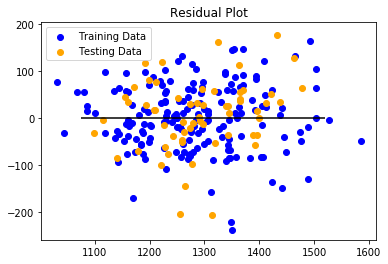

In [16]:
# Plot the results 
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

Create a custom transformer to do the Pandas dummy encoding

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

XX = brain[["size", "gender", "age"]]
yy = brain["weight"].values.reshape(-1, 1)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, random_state=2018)

model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
model.fit(XX_train, yy_train)

predictions = model.predict(XX_test)
MSE = mean_squared_error(yy_test, predictions)
r2 = model.score(XX_test, yy_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5515.396373763891, R2: 0.4602922408994329


In [22]:
model.named_steps.keys()

dict_keys(['pandasdummies', 'standardscaler', 'linearregression'])

Saving a model

In [23]:
from sklearn.externals import joblib
joblib.dump(model, "my_model.pkl")

['my_model.pkl']

Loading a model

In [24]:
some_totally_random_model = joblib.load("my_model.pkl")
some_totally_random_model.named_steps.keys()

dict_keys(['pandasdummies', 'standardscaler', 'linearregression'])

Your Turn!